In [355]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline


In [356]:
ticker= 'CSCO'
data=pd.DataFrame()
data[ticker]=wb.DataReader(ticker,data_source='yahoo',start='2019-8-14')['Adj Close']

In [357]:
#metodo per calcolare il tirotno logaritmico giornaliero
log_returns=np.log(1+data.pct_change())


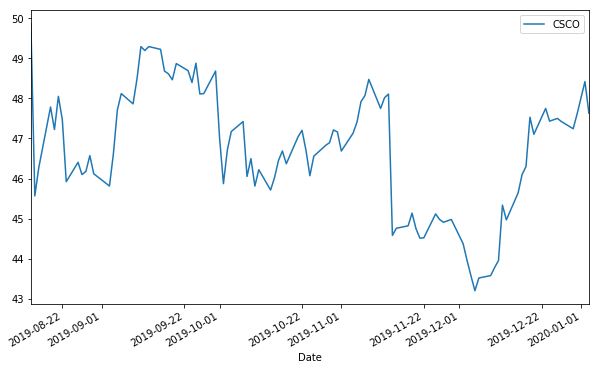

In [358]:
data.plot(figsize=(10,6))

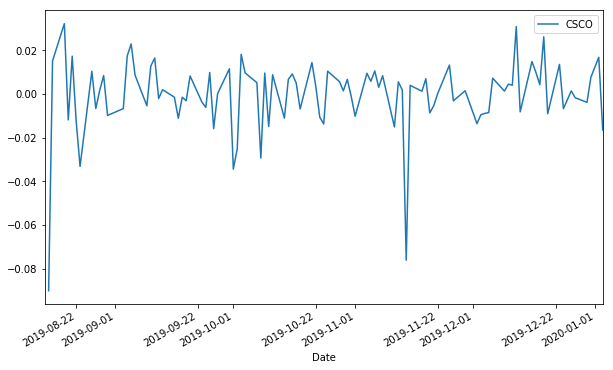

In [359]:
log_returns.plot(figsize=(10,6))

In [360]:
#calcolo la media degli scostamenti giornalieri
u= log_returns.mean()
u

CSCO   -0.000468
dtype: float64

In [361]:
#caloclo la varianza degli scostamenti 
var=log_returns.var()
var

CSCO    0.000293
dtype: float64

In [362]:
#calcolo il DRIFT
drift= u - 0.5*var
drift
#è la miglior approssimazione dei futuri tassi di rendimento della stock

CSCO   -0.000614
dtype: float64

In [363]:
#calcolo la devizione standard
stdev=log_returns.std()
stdev

CSCO    0.017123
dtype: float64

In [364]:
#BROWNIAN MOTIOM
# r=drift + stdev*e^r

In [365]:
#per poterli elaborare bisogna trasmormare in array
np.array(drift)
#oppure
drift.values

array([-0.00061411])

In [366]:
#ora dobbiamo creare la variabile casuale per la generazione di una probabilitò di movimento diversa
# Z corrisponde alla distanza tra la media e l'evento se ho una probabilità del 95% 
norm.ppf(0.95)

1.6448536269514722

In [367]:
#la distanza sarà di 1.65 della dev std


In [368]:
#calcolo la varibile casuale per la probabilità
x=np.random.rand(10,2)
x

array([[0.37090015, 0.02998968],
       [0.18101215, 0.43343556],
       [0.50257374, 0.88287183],
       [0.46721702, 0.7304646 ],
       [0.71879279, 0.68012566],
       [0.54803088, 0.72803909],
       [0.7367264 , 0.83698826],
       [0.15210553, 0.79168737],
       [0.45504895, 0.83302918],
       [0.78357113, 0.94521602]])

In [369]:
#calcolo Z con una probabilità variabile
z=norm.ppf(np.random.rand(10,2))
z

array([[ 1.30554676, -1.25206683],
       [ 0.21616737, -0.12708442],
       [-1.37898773,  1.45286122],
       [ 0.36580225, -0.63699485],
       [-1.49388996, -0.50521463],
       [ 0.2535633 , -0.12717914],
       [ 0.54913059, -0.08767002],
       [-0.69224471,  1.48191333],
       [ 1.56376656,  0.91124462],
       [ 0.58612252,  1.04169009]])

In [370]:
#n° dei giorni di analisi futuri
t_intervals= 15
#n° di previsioni future
iterations= 1000
#ricordando che daily_returns=e^r r=drift+stdev*z

In [371]:
daily_returns= np.exp(drift.values + stdev.values* norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[0.99581225, 0.99077695, 0.98005766, ..., 1.00009929, 1.0130141 ,
        1.00139055],
       [0.98053976, 0.99113857, 1.02366275, ..., 0.9968973 , 0.99683171,
        1.00600828],
       [1.01213826, 0.96928834, 1.01217217, ..., 0.98961801, 0.98843963,
        1.00117985],
       ...,
       [0.99835062, 0.99089041, 1.03055153, ..., 1.01341361, 0.97742729,
        1.00557623],
       [1.00203107, 1.00392809, 0.97667091, ..., 1.00628725, 0.97051693,
        1.00826171],
       [0.96890102, 1.02461367, 1.00878644, ..., 0.97096546, 0.98748404,
        0.97775903]])

In [372]:
#ora devo creare le serie storiche

In [373]:
#prendo l'ultimo valore conosciuto
S0 =data.iloc[-1]
S0

CSCO    47.630001
Name: 2020-01-03 00:00:00, dtype: float64

In [374]:
#creo una matrice vuotsa da rimepire con il valore delle quotaz giornaliere
price_list=np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [375]:
price_list[0]=S0
for t in range(1,t_intervals):
    price_list[t]=price_list[t-1]*daily_returns[t]
price_list

array([[47.63000107, 47.63000107, 47.63000107, ..., 47.63000107,
        47.63000107, 47.63000107],
       [46.70310991, 47.20793126, 48.75705783, ..., 47.4822193 ,
        47.47909553, 47.91617549],
       [47.27000421, 45.75809714, 49.35053705, ..., 46.98925935,
        46.93021962, 47.97270929],
       ...,
       [46.44656959, 45.5011855 , 51.34017958, ..., 49.33092968,
        49.37009527, 46.81526105],
       [46.54090592, 45.6799181 , 50.14245976, ..., 49.64108551,
        47.91451334, 47.20203518],
       [45.09353136, 46.80426863, 50.58303341, ..., 48.19977921,
        47.31481724, 46.15221608]])

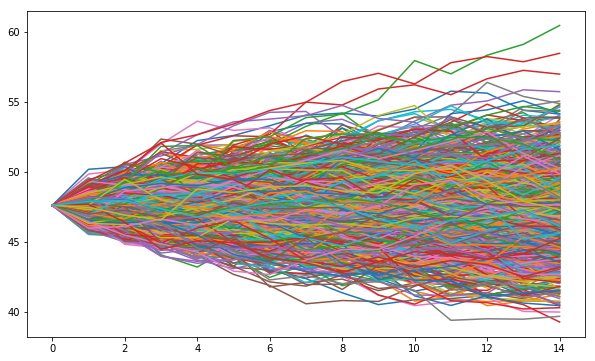

In [376]:
plt.figure(figsize=(10,6))
plt.plot(price_list);

In [380]:
#calcolo probabilià che sia maggiore del valore attuale
maggiore=0
minore=0
p_maggiore=[]
p_minore=[]
for t in range(0,iterations-1):
  
    if price_list[0,t]>=price_list[t_intervals-1,t]:
        minore += 1
        #np.put(p_minore,price_list[t_intervals-1,t],axis=0)
    else:
        maggiore += 1
        #np.append(p_maggiore,price_list[t_intervals-1,t],axis=0)
#calcolo percentuale
totale=maggiore+minore
p_maggiore=maggiore/totale
p_minore=minore/totale
print(np.mean(np.sum())

print("La probabilità che a " + str(t_intervals) +" giorni " +"sia maggiore è del " + str(round(p_maggiore*100,2)) + "%")
print("La probabilità che a " + str(t_intervals) +" giorni " +"sia minore è del "  + str(round(p_minore*100,2)) + "%")

47.516954360594134
La probabilità che a 15 giorni sia maggiore è del 45.05%
La probabilità che a 15 giorni sia minore è del 54.95%


In [285]:
p_minore


0.0

In [286]:
p_maggiore

1.0